# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [56]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
# class_weights_dict = data["class_weights"]
num_classes = data["num_classes"]

### Data Normalization

In [57]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [58]:
def leNet_model_iteration5(num_classes):
    model = Sequential()
    model.add(Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = leNet_model_iteration5(num_classes)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


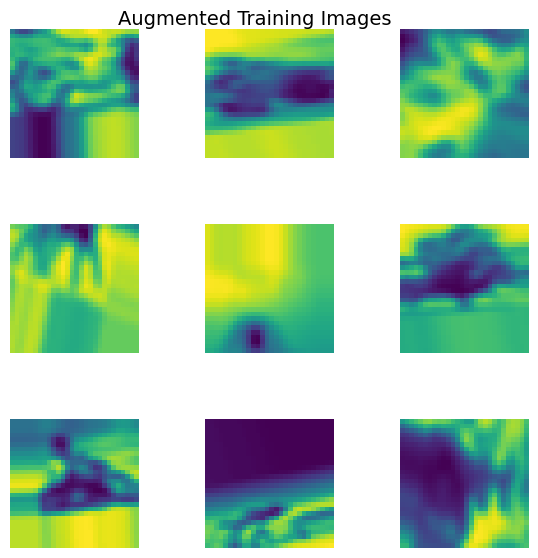

In [59]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [60]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.1431 - loss: 2.6570 - val_accuracy: 0.2703 - val_loss: 2.3741
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2115 - loss: 2.5115 - val_accuracy: 0.2765 - val_loss: 2.3547
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2359 - loss: 2.4506 - val_accuracy: 0.3033 - val_loss: 2.2646
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2591 - loss: 2.3994 - val_accuracy: 0.3360 - val_loss: 2.2008
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.2723 - loss: 2.3580 - val_accuracy: 0.3508 - val_loss: 2.1443
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2759 - loss: 2.3429 - val_accuracy: 0.3424 - val_loss: 2.1442
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2856 - loss: 2.3147 - val_accuracy: 0.3646 - val_loss: 2.0802
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.2947 - loss: 2.3057 - val_accurac

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5419 - loss: 1.4249
Test Loss: 1.7727563381195068
Test Accuracy: 0.4748351573944092


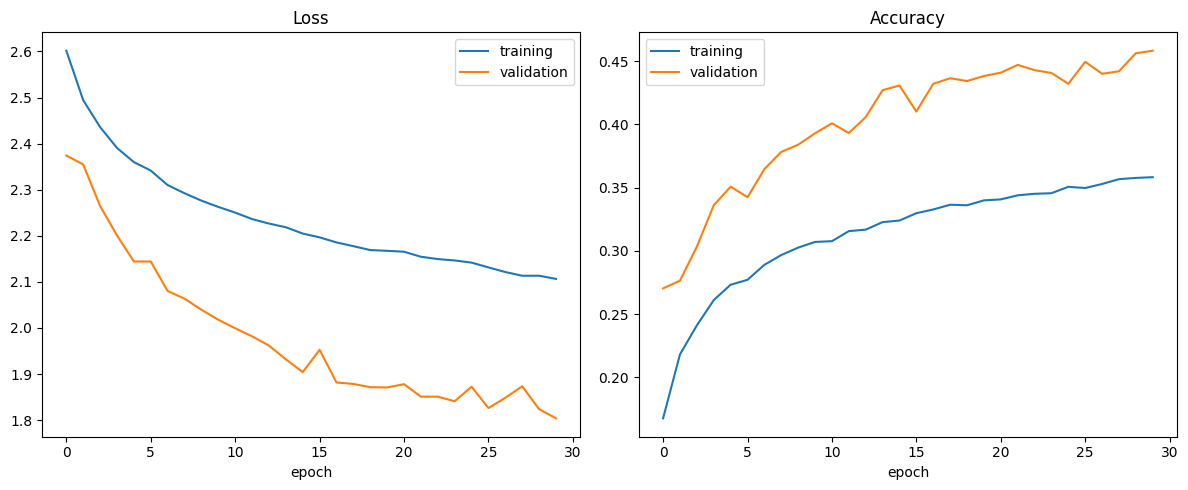

In [61]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
